In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\49157\anaconda3\envs\dataenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Get rid of duplicates

In [3]:
df.loc[:, 'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [4]:
#Get rid of rows with salary_rate NaN by replacing them with the median salary
median_salary_year = df['salary_year_avg'].median()
median_salary_hour = df['salary_hour_avg'].median()

In [16]:
df_filled = df.copy()
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_salary_year)
df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [17]:
df_filled.loc[:10, 'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [18]:
#Drop duplicates
df_unique = df_filled
df_unique = df_filled.drop_duplicates()
print('length of original df:', len(df_filled))
print('length of df after dropping duplicates:', len(df_unique))
print('Rows dropped:', len(df_filled) - len(df_unique))


length of original df: 785741
length of df after dropping duplicates: 785640
Rows dropped: 101


In [19]:
#Drop duplicates based on specific columns, more precisely
df_unique = df_unique.drop_duplicates(subset=['job_title', 'company_name'])
print('length of original df:', len(df_filled))
print('length of df after dropping duplicates:', len(df_unique))
print('Rows dropped:', len(df_filled) - len(df_unique))

length of original df: 785741
length of df after dropping duplicates: 508042
Rows dropped: 277699


## Sample method

In [20]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [21]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [22]:
#Sample data that changes every time
df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
462573,Data Scientist,Data Scientist,"Fort Mill, SC",via AccruePartners,Full-time,False,"Illinois, United States",2023-07-13 14:03:59,False,False,United States,None,NaN,NaN,AccruePartners,"['python', 'sql', 'r', 'numpy', 'pandas', 'sci...","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
421399,Data Analyst,Data Analyst,"Bogotá, Bogota, Colombia",via BeBee,Full-time,False,Colombia,2023-12-28 16:34:01,True,False,Colombia,None,NaN,NaN,Habi,"['sql', 'python', 'aws', 'gcp']","{'cloud': ['aws', 'gcp'], 'programming': ['sql..."
638858,Data Analyst,Staff Technical Data Analyst,"Mountain View, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-01 12:00:44,False,False,United States,None,NaN,NaN,Intuit,"['sql', 'python', 'r', 'redshift', 'tableau']","{'analyst_tools': ['tableau'], 'cloud': ['reds..."
506713,Data Engineer,Data Engineer (In Marketing Tech),"Sofia, Bulgaria",via LinkedIn Bulgaria,Full-time,False,Bulgaria,2023-02-10 12:24:16,False,False,Bulgaria,None,NaN,NaN,Flix,"['python', 'sql', 'aws', 'git']","{'cloud': ['aws'], 'other': ['git'], 'programm..."
88427,Data Engineer,specialist data engineer,"Poznań, Poland",via BeBee,Full-time,False,Poland,2023-08-20 00:23:15,True,False,Poland,None,NaN,NaN,Santander,['sql'],{'programming': ['sql']}
575724,Data Scientist,Junior Analyst,"Birkirkara, Malta",via Trabajo.org,Full-time,False,Malta,2023-07-12 09:50:46,False,False,Malta,None,NaN,NaN,Malta Financial Services Authority,None,None
251623,Senior Data Scientist,Senior Data Scientist,Türkiye,via Learn4Good.com,Full-time,False,Turkey,2023-09-19 00:13:22,False,False,Turkey,None,NaN,NaN,Migros Ticaret,"['sql', 'python', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
218607,Data Analyst,HR Analyst Data Consultant,Mexico,via LinkedIn,Full-time,False,Mexico,2023-06-30 22:23:56,False,False,Mexico,None,NaN,NaN,Deloitte,"['react', 'sap', 'power bi', 'excel']","{'analyst_tools': ['sap', 'power bi', 'excel']..."
59459,Software Engineer,Principal Software Engineer Ios,"Montevideo, Montevideo Department, Uruguay","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Uruguay,2023-11-04 06:58:52,True,False,Uruguay,None,NaN,NaN,PedidosYa,['swift'],{'programming': ['swift']}
152174,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-12-14 08:10:45,False,False,India,None,NaN,NaN,PropertyGuru Group,"['python', 'aws', 'gcp', 'azure', 'pytorch', '...","{'cloud': ['aws', 'gcp', 'azure'], 'libraries'..."


In [15]:
#Sample data that stays the same with parameter random_state
df.sample(10, random_state=42)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
502901,Senior Data Engineer,Senior Data Engineer,"St Paul, MN",via BeBee,Full-time,False,"Florida, United States",2023-12-17 11:09:06,False,False,United States,None,NaN,NaN,ManpowerGroup,"['sql', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
406337,Senior Data Scientist,Senior Analytics Engineer,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-10-06 16:09:56,False,False,United Kingdom,None,NaN,NaN,Harnham,"['sql', 'python', 'bigquery', 'snowflake', 'lo...","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."
659951,Data Engineer,Data Engineer,"Newcastle upon Tyne, UK",via Indeed,Full-time,False,United Kingdom,2023-09-06 10:11:25,True,False,United Kingdom,None,NaN,NaN,Morgan King,None,None
541593,Data Analyst,Data Analyst,Malta,via Trabajo.org,Full-time,False,Malta,2023-02-14 21:14:18,True,False,Malta,None,NaN,NaN,Konnekt,['jira'],{'async': ['jira']}
425158,Senior Data Engineer,Senior Data Engineer. Job in Amsterdam NBC4i Jobs,"Amsterdam, Netherlands",via NBC4i Jobs,Full-time,False,Netherlands,2023-06-19 16:34:30,True,False,Netherlands,None,NaN,NaN,Independent Recruiters,['python'],{'programming': ['python']}
183426,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-11-09 16:07:57,False,False,Singapore,None,NaN,NaN,FLEXOSENSE PTE. LTD.,"['r', 'python', 'java', 'sql', 'sql server', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
287790,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-07-14 17:02:23,True,False,United States,None,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['ha..."
541983,Data Analyst,"Data Analyst, Cloud Systems Jobs","Chantilly, VA",via Clearance Jobs,Full-time,False,Georgia,2023-06-15 19:44:34,False,False,United States,None,NaN,NaN,SAIC,"['sql', 'r', 'matlab', 'python', 'oracle', 'aw...","{'analyst_tools': ['power bi', 'tableau', 'qli..."
416896,Data Scientist,Alternant Actuariat & Data Science H/F,France,via LinkedIn,Full-time,False,France,2023-09-22 16:47:24,False,False,France,None,NaN,NaN,KPMG France,None,None
780907,Data Engineer,"Data Engineer with Fivetran,Qlik Must","Mexico City, CDMX, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-16 06:19:09,False,False,Mexico,None,NaN,NaN,CORUS Consulting,"['oracle', 'snowflake', 'aws', 'azure', 'alter...","{'analyst_tools': ['alteryx'], 'cloud': ['orac..."


## Privot tables method

In [23]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [24]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

<Axes: xlabel='job_country'>

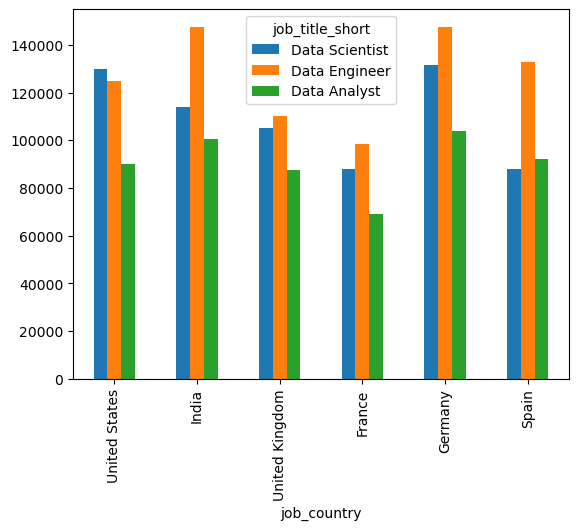

In [ ]:
#Counts of job titles
top_countries = df['job_country'].value_counts().head(6).index
df_job_country_salary = df.pivot_table(index='job_country', 
               values='salary_year_avg', columns='job_title_short', 
               aggfunc='median') 
df_job_country_salary = df_job_country_salary.loc[top_countries]
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary.plot(kind='bar')

## Index Management

In [26]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [27]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [28]:
df.index

RangeIndex(start=0, stop=785741, step=1)

In [29]:
df.index.name = 'job_index'
df.index.dtype

dtype('int64')

In [30]:
df_usa = df[df['job_country'] == 'United States']
df_usa.reset_index(inplace=True) # gives a new index
df_usa

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [31]:
df_usa.set_index('job_index', inplace=True)#set a specific column as index
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [ ]:
median_pivot = df_usa.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc= ['median', 'max', 'min'])
#Sort by a specific value
median_pivot.sort_values(by=('median', 'salary_year_avg'), ascending=False, inplace=True)
median_pivot.sort_index()

,median,max,min
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,90000.0,387460.0,35000.0
Cloud Engineer,116100.0,221844.0,42000.0
Data Analyst,90000.0,375000.0,25000.0
Data Engineer,125000.0,525000.0,23496.0
Data Scientist,130000.0,960000.0,30000.0
Machine Learning Engineer,150000.0,315000.0,44408.5
Senior Data Analyst,110000.0,425000.0,35360.0
Senior Data Engineer,150000.0,375000.0,45000.0


## Exercise: Analysing Data Science montly job demand

In [33]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [34]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [36]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January


In [ ]:
#Arrange the job title in the columns and months in the rows and find the counts
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,565,40,6049,2801,4867,51,1025,781,991,112
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
2,December,648,40,3979,2641,3472,119,601,689,752,212
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
5,July,581,39,5201,2570,4876,65,883,747,1095,153
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
8,May,279,20,4993,2976,4377,49,839,746,914,90
9,November,719,36,4531,2793,4175,132,656,684,816,194


In [38]:
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot.sort_values('month_no', inplace=True)


In [39]:
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot.drop(columns='month_no', inplace=True)
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [41]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3


['Data Analyst', 'Data Scientist', 'Data Engineer']

Text(0.5, 1.0, 'Top 3 Job Titles Posted in the US by Month')

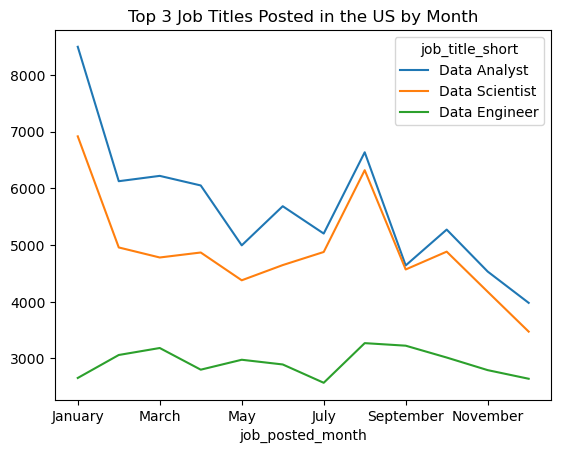

In [42]:
df_US_pivot[top_3].plot(kind='line')
plt.title('Top 3 Job Titles Posted in the US by Month')

## Merge Data Frames

In [43]:

job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [44]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


Real example

In [45]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot.drop(columns='month_no', inplace=True)
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [46]:
df_US_software_pivot = pd.read_csv('http://lukeb.co/software_csv', index_col='job_posted_month')
df_US_software_pivot 

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [48]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on = 'job_posted_month')
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [50]:
top_5 = df_US_merged.sum().sort_values(ascending=False).head().index.tolist()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

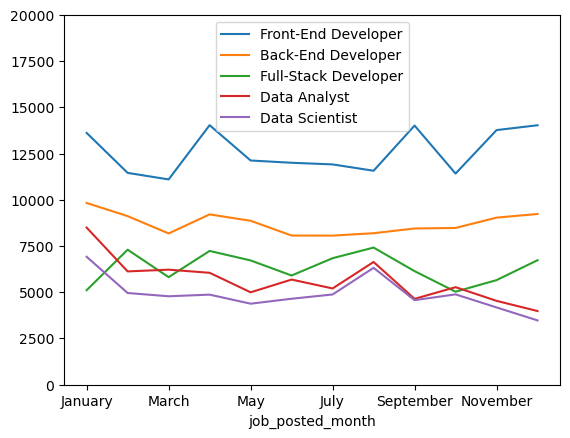

In [51]:
df_US_merged[top_5].plot(kind='line')
plt.ylim(0, 20000)
plt.legend()
plt.show()

## Concat Method (does not create new colums but append new data rows to existing columns)

In [53]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [54]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [55]:
# Concatenate the two DataFrames
job_postings_combined = pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)

job_postings_combined

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


# Concat real exercise

In [56]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [57]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [58]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

In [60]:
months = df['job_posted_month'].unique()
dict_months = {month : df[df['job_posted_month'] == month] for month in months}
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


<Axes: xlabel='job_posted_month'>

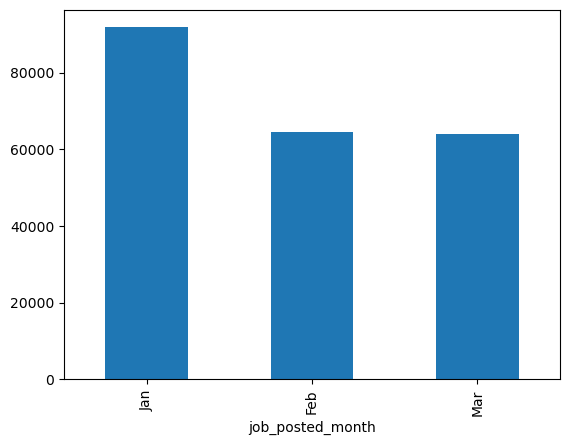

In [61]:
df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)
df_q1['job_posted_month'].value_counts().plot(kind='bar')

# Exporting DataFrames with different formats

In [62]:
#Copy to clipboard
df_q1.head().to_clipboard(sep=',')

In [31]:
#Copy to csv
df_q1.to_csv('quarter_1.csv')
pd.read_csv('quarter_1.csv', index_col=0)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [32]:
df_q1.to_excel('quarter_1.xlsx')

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data_jobs.db')
df.to_sql('job_table', con=engine, if_exists='append', index=False)

In [ ]:
#For large datasets, use Parquet format
to_parquet = df.to_parquet('data_jobs.parquet')
df.to_pickle

## Applying functions

In [63]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [64]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [65]:
df_salary = df[pd.notna(df['salary_year_avg'])]
df_salary

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd..."
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac..."
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [66]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()
def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)
df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [72]:
import ast


In [73]:
#type(ast.literal_eval(df['job_skills'][0]))

In [74]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

In [75]:
df['job_skills'] = df['job_skills'].apply(clean_list)

In [76]:
#Apply a funcction to a row, axis 1
def projected_salary(row):
    if 'Senior' in row['job_title_short']:
        return row['salary_year_avg'] * 1.05
    else:
        return row['salary_year_avg'] * 1.03
    
df_salary['salary_year_inflated'] = df_salary.apply(projected_salary, axis=1)

In [77]:
df_salary[['job_title_short', 'salary_year_avg', 'salary_year_inflated']].head()


,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00


## Pandas explode

In [2]:
import pandas as pd
data = {
    'job_title_short': ['Data Scientist', 'Software Engineer', 'Product Manager'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['excel', 'aws', 'python', 'airflow']]
    }
df_skill_lists = pd.DataFrame(data)
df_skill_lists

,job_title_short,job_skills
0,Data Scientist,"[excel, sql, python]"
1,Software Engineer,"[python, r]"
2,Product Manager,"[excel, aws, python, airflow]"


<Axes: xlabel='job_skills'>

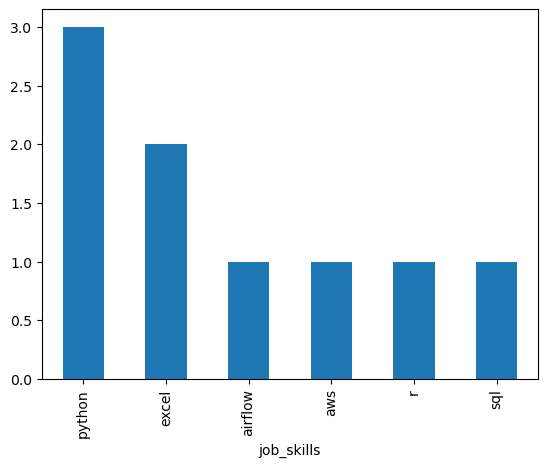

In [5]:
df_skill_lists.explode('job_skills').value_counts('job_skills').plot(kind='bar')

Real exercise

In [6]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\49157\anaconda3\envs\dataenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


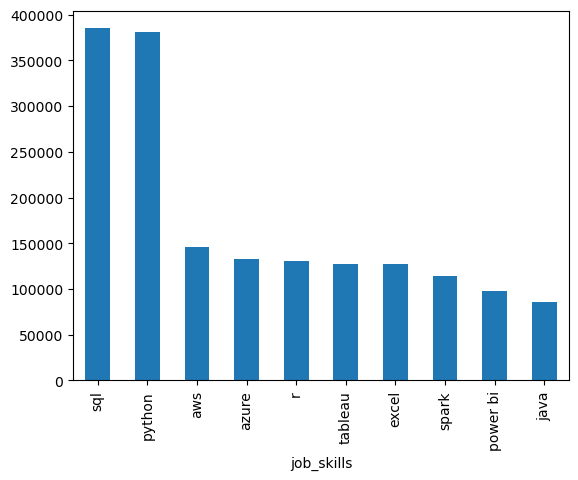

In [9]:
df_exploded = df.explode('job_skills').value_counts('job_skills').head(10).plot(kind='bar')

In [12]:
df_exploded = df.explode('job_skills')
#Size for counting occurrences of combinations of job skills and job titles
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [22]:
#transform into a DataFrame
df_skills_count = skills_count.reset_index(name='skill count')
df_skills_count = df_skills_count.sort_values(by='skill count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [23]:
#Top skills for data analyst
job_title = 'Data Analyst'
top_skills = 10
df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final

,job_title_short,job_skills,skill count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


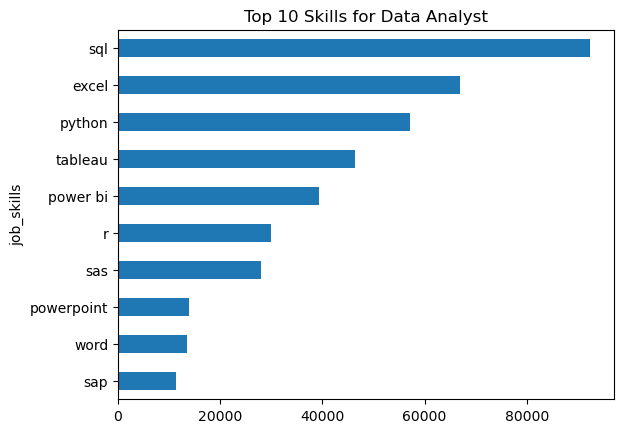

In [25]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill count', legend=False, title=f'Top {top_skills} Skills for {job_title}')   
plt.gca().invert_yaxis()

## Exercise - Investigate Trending Skills

In [26]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [27]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [28]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [29]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3


In [30]:
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [32]:
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


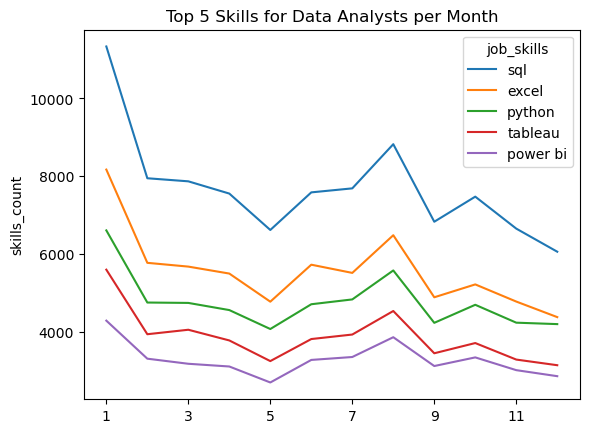

In [33]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('skills_count')
plt.xlabel('')
plt.show()

## Matplot multiple charts

In [34]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [35]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

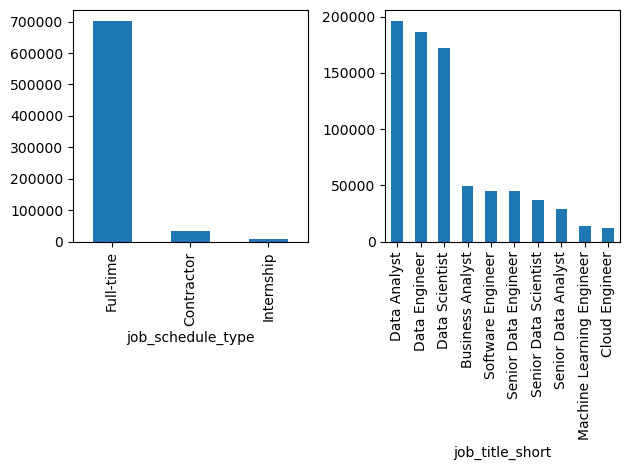

In [37]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax = ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax = ax[0])
fig.tight_layout()

Real exercise

In [40]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
#Size for counting occurrences of combinations of job skills and job titles
skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill count')
df_skills_count.sort_values(by='skill count', ascending=False, inplace=True)
df_skills_count

,job_title_short,job_skills,skill count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


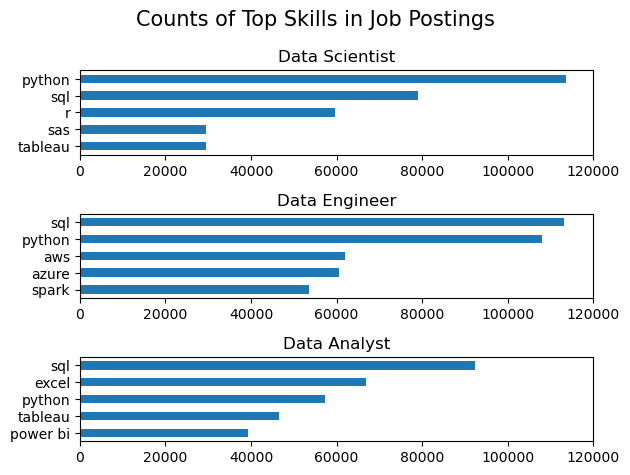

In [46]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

Pie charts

In [55]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [56]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

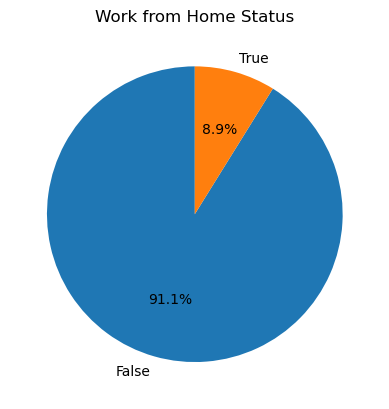

In [54]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel("")
plt.show()

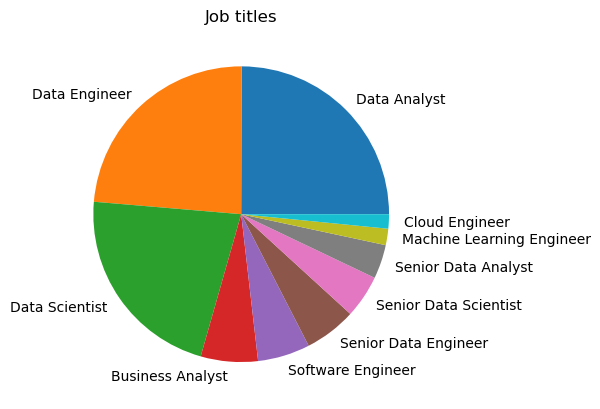

In [51]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job titles')
plt.ylabel("")
plt.show()

In [57]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


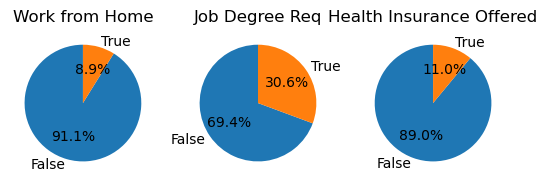

In [60]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

## Scatterplots - correlations

In [72]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [73]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [63]:
df = df[df['job_title_short'] == 'Data Analyst']

In [75]:
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skills_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skills_count)

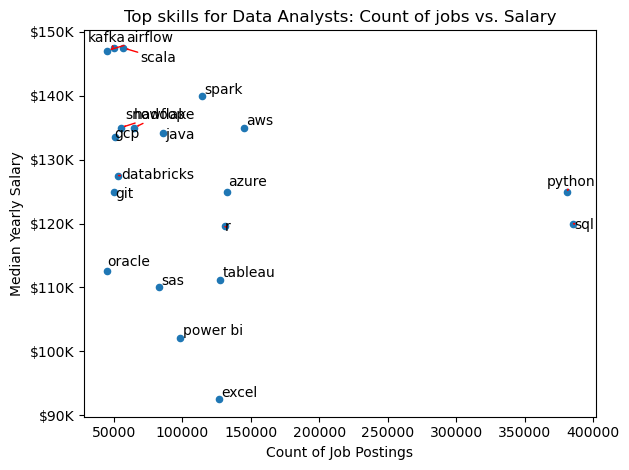

In [79]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Top skills for Data Analysts: Count of jobs vs. Salary')
plt.tight_layout()


plt.show()

Histograms

In [80]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [81]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [82]:
#Only Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'Number of Jobs')

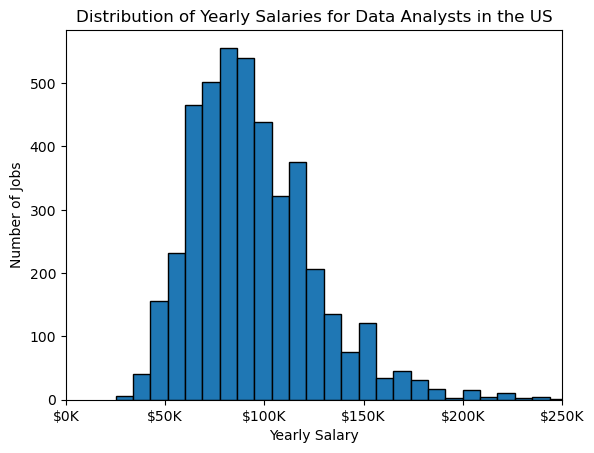

In [84]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K')) 

plt.title('Distribution of Yearly Salaries for Data Analysts in the US')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')


Boxplots

In [85]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [86]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [88]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
#Only Data Analyst jobs in the US
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
#Drop NaN values in salary_year_avg
df_US = df_US[pd.notna(df_US['salary_year_avg'])]

C:\Users\49157\AppData\Local\Temp\ipykernel_25800\1548701248.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


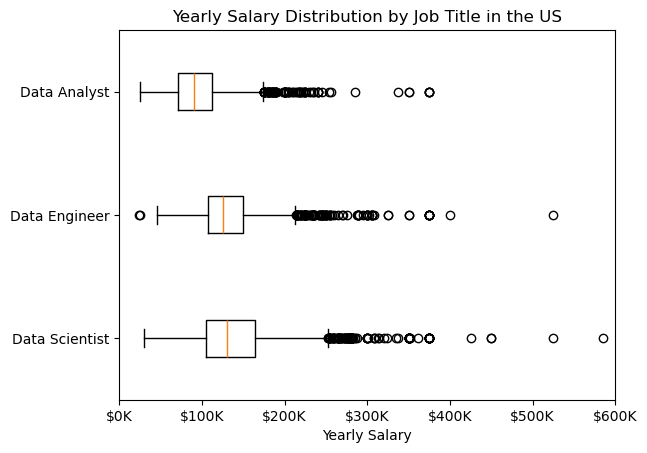

In [93]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Yearly Salary Distribution by Job Title in the US')
plt.xlabel('Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

## Exercise - Incestigate hight paying skills

In [94]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [95]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [102]:
#Only Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US[pd.notna(df_DA_US['salary_year_avg'])]

In [103]:
df_DA_US = df_DA_US.explode('job_skills')


In [104]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10)

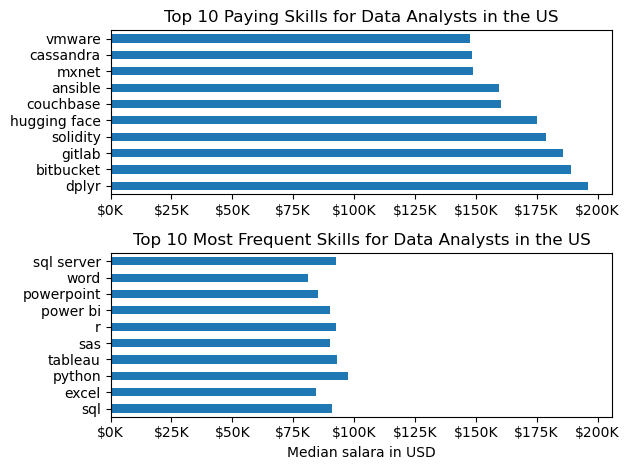

In [112]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Paying Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most Frequent Skills for Data Analysts in the US')
ax[1].set_xlabel('Median salara in USD')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()

## Seaborn

In [114]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [115]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [117]:
import seaborn as sns

In [118]:
#Only Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US[pd.notna(df_DA_US['salary_year_avg'])]

In [119]:
df_DA_US = df_DA_US.explode('job_skills')


In [125]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

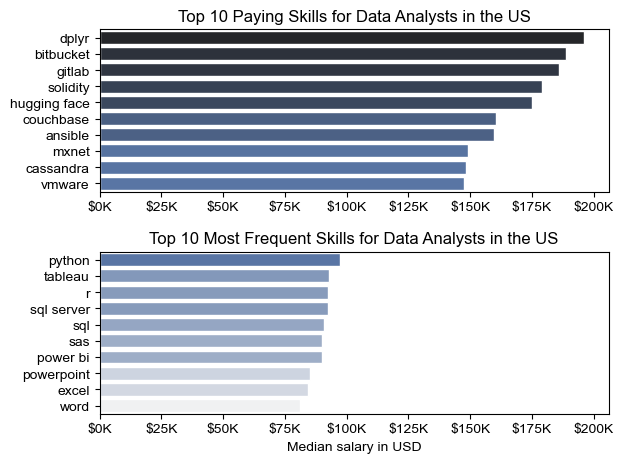

In [128]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].legend().remove()
ax[0].set_title('Top 10 Paying Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

#df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most Frequent Skills for Data Analysts in the US')
ax[1].set_xlabel('Median salary in USD')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()

Text(12.444444444444445, 0.5, 'Number of Jobs')

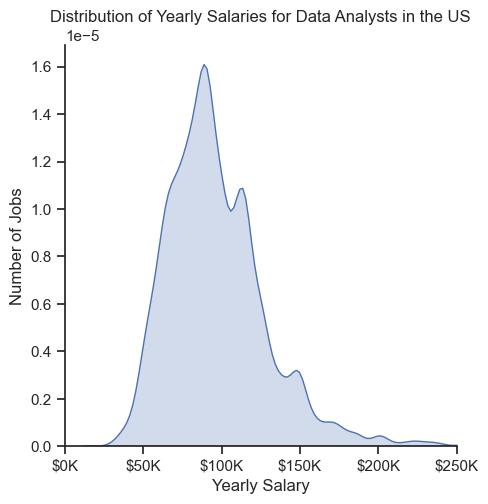

In [131]:
#df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K')) 

plt.title('Distribution of Yearly Salaries for Data Analysts in the US')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')


C:\Users\49157\AppData\Local\Temp\ipykernel_25800\1108232389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', orient='h', palette='pastel')


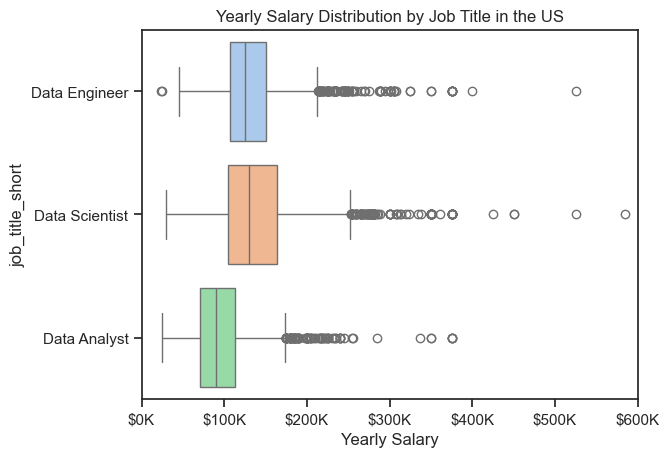

In [132]:
#job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
#plt.boxplot(job_list, labels=job_titles, vert=False)
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', orient='h', palette='pastel')

plt.title('Yearly Salary Distribution by Job Title in the US')
plt.xlabel('Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()